# 1) Min - Max Sacling

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/wine.csv",usecols = [0,1,2])

In [4]:
df.sample(5)

,Wine,Alcohol,Malic.acid
72,2,13.49,1.66
70,2,12.29,1.61
111,2,12.52,2.43
140,3,12.93,2.81
41,1,13.41,3.84


In [6]:
x = df.drop("Wine",axis = 1)
y = df["Wine"]

In [7]:
x

,Alcohol,Malic.acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [8]:
print(x.shape,y.shape)

(178, 2) (178,)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
print(x_train.shape,x_test.shape)

(124, 2) (54, 2)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
scaler

MinMaxScaler()

In [15]:
x_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [16]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

### Before Applying MinMaxScaler determine the value of min and max

In [26]:
round(x_train.describe(),1)

,Alcohol,Malic.acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


### After Applying MinMaxScaler min = 0 and max = 1

In [25]:
round(x_train_scaled.describe(),1)

,Alcohol,Malic.acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


[]

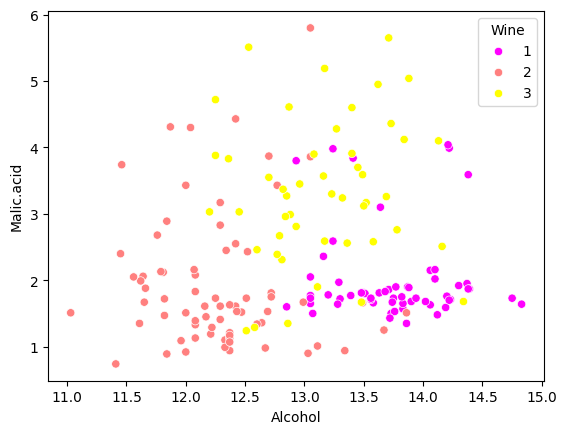

In [23]:
# Just to understand data
sns.scatterplot(x = "Alcohol",y = "Malic.acid",data = df,hue = "Wine",palette = "spring")
plt.plot()

### Comparing without scaled data and Scaled data 

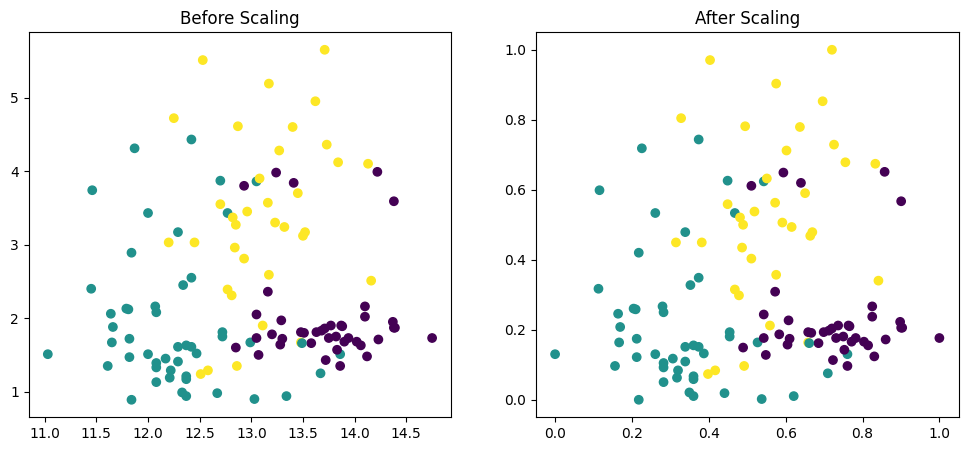

In [34]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.scatter(x_train["Alcohol"],x_train["Malic.acid"],c = y_train)
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled["Alcohol"],x_train_scaled["Malic.acid"],c =y_train )
ax2.set_title("After Scaling")

plt.show()

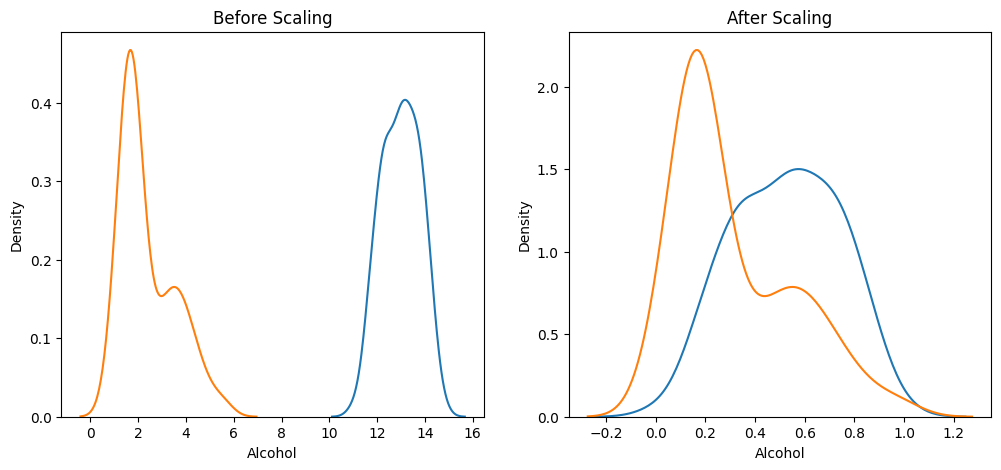

In [36]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Alcohol"],ax = ax1)
sns.kdeplot(x_train["Malic.acid"],ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["Alcohol"],ax = ax2)
sns.kdeplot(x_train_scaled["Malic.acid"],ax = ax2)

plt.show()

### Note: 
### Before Scaling:
### Features like Alcohol and Malic acid are on very different ranges (Alcohol ~10–15, Malic acid ~0–5). This makes one feature dominate in distance-based algorithms (k-NN, SVM, clustering).

### After Scaling:
### Both features are rescaled into the range 0 to 1. This brings them to the same scale, so each contributes equally to the model.

### Observation in Graph:
### After scaling, the KDE curves shift a little into negative values (left side) and extend slightly beyond 1 (right side).
### This happens because StandardScaler standardizes data (mean = 0, std = 1) and KDE (Kernel Density Estimation) smooths the distribution, so the density curve slightly goes below 0 and above 1.
### “In MinMaxScaler, if there is even one outlier, it stretches the whole range. As a result, most of the normal data gets squeezed into a small space, and the outlier affects the scaling too much.”